# A. Introduction
Jo / Sumit / Abeer TODO

## What is data for good?

## Who are we?

1. Abeer Khan
     - University of Waterloo graduate
     - worked in text mining 
     - mining Reddit data
     - long time Waterloo data science meetups stalker 
     - currently software developer
     - for today's + future sessions, helping to organize, conduct, help out during sessions
     
TODO @Jo, @Sumit, @Sepeher, @Rameez, @Melissa to add their bios + roles


## What is the goal(s) of this dfg series on social media mining? (aka Project Overview)

## How many sessions will we have? What are they? Do they depend on each other?

## Today's tutorial overview
1. Goals 
2. How today will help in future sessions 
3. Please do as we do 
4. Will pause for questions. In the meantime, feel free to use the chat to jot down your concerns. One of the non-speakers will response / track these questions to raise when the speaker has paused for questions. 

# B. Prerequisites
1. Install Jupyter https://jupyter.org/install
2. Enable collapsible headings to better navigate this notebook https://forums.fast.ai/t/useful-jupyter-notebook-tips-plugins-collapsible-sections/17919

# C. Set up Twitter API 
1. Rameez TODO 
2. Touch on Twitter API rate limits 
https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline

# D. Scrape - Rameez
1. Will only scrape basic data of user timeline. 
<br> 
Please do experiment with other API calls if you find useful
2. https://gist.github.com/yanofsky/5436496
3. Install tweepy https://docs.tweepy.org/en/latest/install.html
4. Browse tweepy documentation https://docs.tweepy.org/en/latest/api.html


In [66]:
import tweepy #https://github.com/tweepy/tweepy
import csv
import pandas as pd

In [21]:
#Twitter API credentials
consumer_key = "TtD9U0BnS7lpPNWDczHlwFQLu" #aka API Key 
consumer_secret = "NX4PlnMW4zhpAY2x2mGQeWkXaqU5vW8iuxtp05NgGXRJIWsmlI" #aka API key secret
access_key = "3140322834-klPZjrPGOfmYDHQygEGyv5tBDkphVN3nQPfP02u" #aka Access token 
access_secret = "pEkjDtKa7GyiM34FmhQvRTBY4Kar8Lfsm7UNU4KrTVBiP"#aka Access token secret

In [22]:
#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

## 0. Data dictionary
While scraping, skip back & forth between the code & dictionary to see what each attribute represents 
https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f

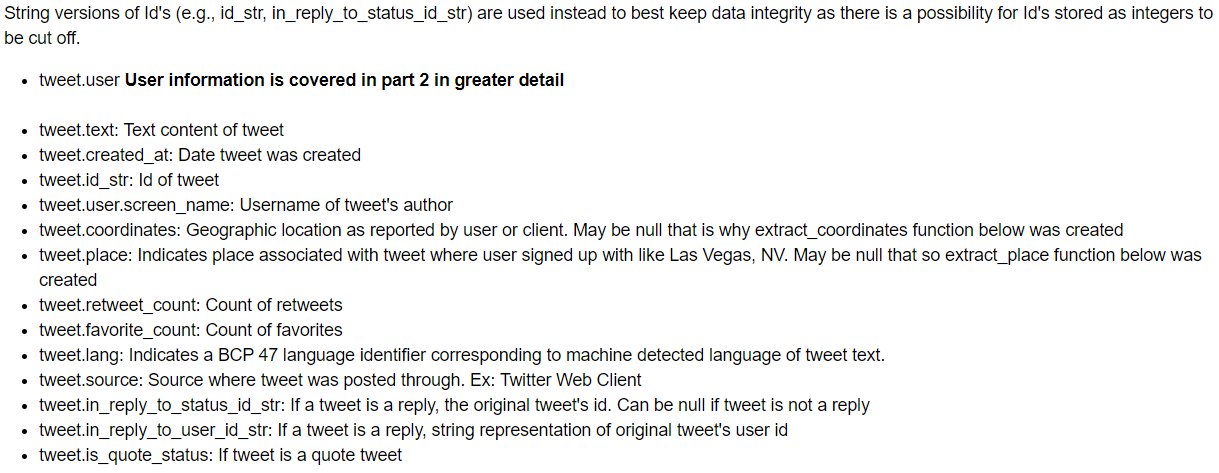

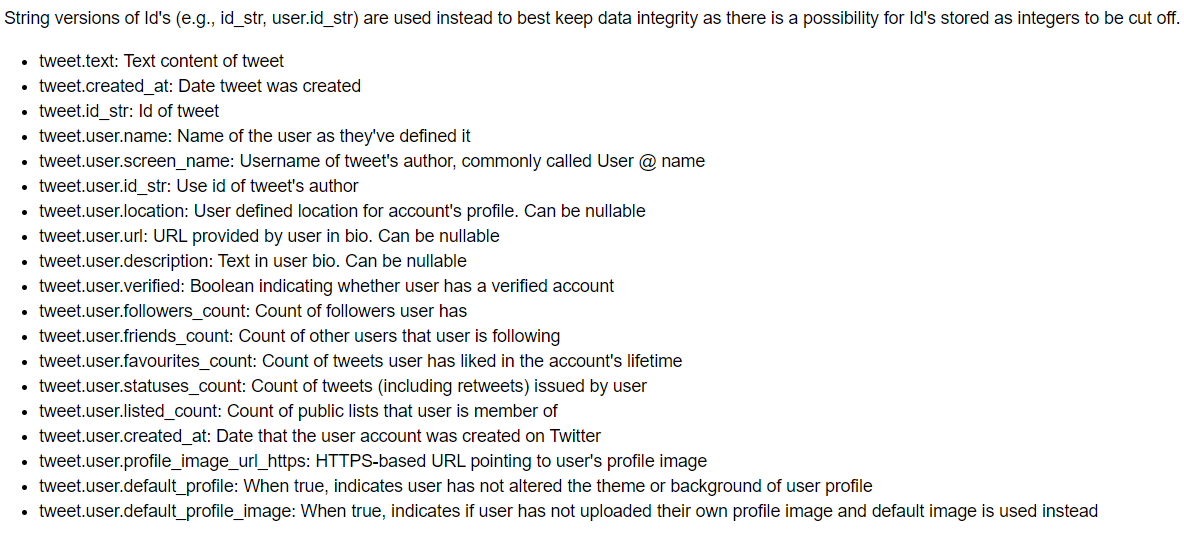

## 1. get User timeline
1. https://developer.twitter.com/en/docs/twitter-api/v1/tweets/timelines/api-reference/get-statuses-user_timeline
2. https://docs.tweepy.org/en/latest/api.html

In [37]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name=screen_name, count=200)
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print (f"...{len(new_tweets)} tweets downloaded in this iteration")
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    
    #write the csv  
    with open(f'data/new_{screen_name}_tweets.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass

In [7]:
#pass in the username of the account you want to download
get_all_tweets("WaterlooLibrary")

getting tweets before 1349061399960563714
...200 tweets downloaded in this iteration
...400 tweets downloaded so far
getting tweets before 1336660619152535553
...199 tweets downloaded in this iteration
...599 tweets downloaded so far
getting tweets before 1327978410040119295
...200 tweets downloaded in this iteration
...799 tweets downloaded so far
getting tweets before 1318972820022562817
...200 tweets downloaded in this iteration
...999 tweets downloaded so far
getting tweets before 1310206305492176895
...200 tweets downloaded in this iteration
...1199 tweets downloaded so far
getting tweets before 1301490131153477633
...200 tweets downloaded in this iteration
...1399 tweets downloaded so far
getting tweets before 1290618490957832191
...200 tweets downloaded in this iteration
...1599 tweets downloaded so far
getting tweets before 1281288257028775935
...200 tweets downloaded in this iteration
...1799 tweets downloaded so far
getting tweets before 1272213460823109633
...200 tweets down

In [8]:
#pass in the username of the account you want to download
get_all_tweets("KitchLibrary")

getting tweets before 1343920091633758210
...200 tweets downloaded in this iteration
...400 tweets downloaded so far
getting tweets before 1319708936669450241
...200 tweets downloaded in this iteration
...600 tweets downloaded so far
getting tweets before 1295722938168115200
...200 tweets downloaded in this iteration
...800 tweets downloaded so far
getting tweets before 1273679905277054975
...200 tweets downloaded in this iteration
...1000 tweets downloaded so far
getting tweets before 1254828291602644996
...200 tweets downloaded in this iteration
...1200 tweets downloaded so far
getting tweets before 1241786989168427010
...200 tweets downloaded in this iteration
...1400 tweets downloaded so far
getting tweets before 1221831283157950463
...199 tweets downloaded in this iteration
...1599 tweets downloaded so far
getting tweets before 1197237720826994690
...200 tweets downloaded in this iteration
...1799 tweets downloaded so far
getting tweets before 1159805450658955263
...199 tweets dow

In [ ]:
WaterlooLibrary_df = pd.read_csv('data/new_WaterlooLibrary_tweets.csv')
WaterlooLibrary_df

In [ ]:
KitchLibrary_df = pd.read_csv('data/new_WaterlooLibrary_tweets.csv')
KitchLibrary_df

## 2. get more detailed User timeline 
https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f

### Example of a search query pulling all tweet related information from a user’s tweets:

In [16]:
# Function created to extract coordinates from tweet if it has coordinate info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_coordinates(row):
    if row['Tweet Coordinates']:
        return row['Tweet Coordinates']['coordinates']
    else:
        return None
# Function created to extract place such as city, state or country from tweet if it has place info
# Tweets tend to have null so important to run check
# Make sure to run this cell as it is used in a lot of different functions below
def extract_place(row):
    if row['Place Info']:
        return row['Place Info'].full_name
    else:
        return None

In [61]:
def getDetailedTweetInformation(username): 
    max_tweets = 200
    
    alltweets = []  

    # tweet_mode='extended' to Access Tweet Text up to 280 characters
    new_tweets = tweepy.Cursor(api.user_timeline,
                           id=username,
                          tweet_mode='extended').items(max_tweets)
    # Pulling information from tweets iterable object
    # Add or remove tweet information you want in the below list comprehension
    new_tweets = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.screen_name, 
                    tweet.coordinates, tweet.place, tweet.retweet_count, tweet.favorite_count, 
                    tweet.lang, tweet.source, tweet.in_reply_to_status_id_str, 
                    tweet.in_reply_to_user_id_str, tweet.is_quote_status] 
                   for tweet in new_tweets]
    
    alltweets.extend(new_tweets)
    oldest = int(alltweets[-1][2]) - 1 #index 2 has id_str = tweet id 
    
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = tweepy.Cursor(api.user_timeline,
                           id=username,
                          tweet_mode='extended',max_id=oldest).items(max_tweets)
    

        # Pulling information from tweets iterable object
        # Add or remove tweet information you want in the below list comprehension
        new_tweets = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.screen_name, 
                        tweet.coordinates, tweet.place, tweet.retweet_count, tweet.favorite_count, 
                        tweet.lang, tweet.source, tweet.in_reply_to_status_id_str, 
                        tweet.in_reply_to_user_id_str, tweet.is_quote_status] 
                       for tweet in new_tweets]
        
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = int(alltweets[-1][2]) - 1 #index 2 has id_str = tweet id 
        
        print (f"...{len(new_tweets)} tweets downloaded in this iteration")
        print(f"...{len(alltweets)} tweets downloaded so far")
    

    
    # Creation of dataframe from tweets_list
    # Add or remove columns as you remove tweet information
    tweets_df = pd.DataFrame(alltweets, columns=['Tweet Full Text', 'Tweet Datetime', 'Tweet Id', 'Twitter @ Name', 'Tweet Coordinates', 'Place Info', 'Retweets', 'Favorites', 'Language', 'Source', 'Replied Tweet Id', 'Replied Tweet User Id Str', 'Quote Status Bool'])

    # Checks if there are coordinates attached to tweets, if so extracts them
    tweets_df['Tweet Coordinates'] = tweets_df.apply(extract_coordinates,axis=1)

    # Checks if there is place information available, if so extracts them
    tweets_df['Place Info'] = tweets_df.apply(extract_place,axis=1)
    
    tweets_df.to_csv(f'data/detailed_{username}_tweets.csv', 'w')
    
    return tweets_df

In [62]:
WaterlooLibrary_detailed_df = getDetailedTweetInformation("WaterlooLibrary")


getting tweets before 1349061399960563714
...200 tweets downloaded in this iteration
...400 tweets downloaded so far
getting tweets before 1336660619152535553
...200 tweets downloaded in this iteration
...600 tweets downloaded so far
getting tweets before 1327765758718275584
...200 tweets downloaded in this iteration
...800 tweets downloaded so far
getting tweets before 1318960240289742848
...200 tweets downloaded in this iteration
...1000 tweets downloaded so far
getting tweets before 1310190702324834304
...200 tweets downloaded in this iteration
...1200 tweets downloaded so far
getting tweets before 1301297351798202369
...200 tweets downloaded in this iteration
...1400 tweets downloaded so far
getting tweets before 1290481198276337672
...200 tweets downloaded in this iteration
...1600 tweets downloaded so far
getting tweets before 1281271900027662337
...200 tweets downloaded in this iteration
...1800 tweets downloaded so far
getting tweets before 1272168162474233860
...200 tweets dow

In [63]:
WaterlooLibrary_detailed_df

,Tweet Full Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool
0,RT @Laurier: Everyone has a story.\n\nLaurier ...,2021-02-20 17:02:12,1363172112178049024,WaterlooLibrary,None,None,3,0,en,TweetDeck,None,None,False
1,Were you swept away by Bridgerton? Are you a f...,2021-02-20 15:00:00,1363141359612416008,WaterlooLibrary,None,None,0,1,en,TweetDeck,None,None,False
2,We asked our staff what some of their favourit...,2021-02-20 00:00:01,1362914870027452417,WaterlooLibrary,None,None,1,7,en,TweetDeck,None,None,False
3,We're hiring! You could be a part of our story...,2021-02-19 19:44:25,1362850545845882887,WaterlooLibrary,None,None,0,2,en,TweetDeck,None,None,False
4,"When Aiden disappears for 6 days, everyone is ...",2021-02-19 14:54:57,1362777700038045697,WaterlooLibrary,None,None,0,0,en,TweetDeck,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,"Creative writers and readers, join WPL blogger...",2019-11-29 17:18:38,1200464097038544896,WaterlooLibrary,None,None,0,0,en,TweetDeck,None,None,True
3204,Each year people ask what the most popular #No...,2019-11-29 15:15:00,1200432981229199361,WaterlooLibrary,None,None,1,3,en,TweetDeck,None,None,False
3205,10 Book and Snack Pairings for Maximum Holiday...,2019-11-29 00:11:00,1200205481685467140,WaterlooLibrary,None,None,0,2,en,TweetDeck,None,None,False
3206,Tis the season for #baking When WPL blogger Sa...,2019-11-28 21:44:32,1200168621747658755,WaterlooLibrary,None,None,0,6,en,TweetDeck,None,None,False


In [64]:
KitchLibrary_detailed_df = getDetailedTweetInformation("KitchLibrary")

getting tweets before 1343920091633758210
...200 tweets downloaded in this iteration
...400 tweets downloaded so far
getting tweets before 1319708936669450241
...200 tweets downloaded in this iteration
...600 tweets downloaded so far
getting tweets before 1295722938168115200
...200 tweets downloaded in this iteration
...800 tweets downloaded so far
getting tweets before 1273679905277054975
...200 tweets downloaded in this iteration
...1000 tweets downloaded so far
getting tweets before 1254828291602644996
...200 tweets downloaded in this iteration
...1200 tweets downloaded so far
getting tweets before 1241786989168427010
...200 tweets downloaded in this iteration
...1400 tweets downloaded so far
getting tweets before 1221831283157950463
...200 tweets downloaded in this iteration
...1600 tweets downloaded so far
getting tweets before 1197204868710223872
...200 tweets downloaded in this iteration
...1800 tweets downloaded so far
getting tweets before 1159436659349499903
...200 tweets dow

In [65]:
KitchLibrary_detailed_df

,Tweet Full Text,Tweet Datetime,Tweet Id,Twitter @ Name,Tweet Coordinates,Place Info,Retweets,Favorites,Language,Source,Replied Tweet Id,Replied Tweet User Id Str,Quote Status Bool
0,"If you know, you know 😆 https://t.co/VcmYe0HNDn",2021-02-20 15:55:03,1363155213624999937,KitchLibrary,None,None,1,13,en,Hootsuite Inc.,None,None,False
1,@Vanillabn Yep! That's our overflowing holds s...,2021-02-19 21:55:10,1362883451880431620,KitchLibrary,None,None,0,1,en,Twitter Web App,1362882374770507776,122223738,False
2,"""Has the library been busy lately?"" https://t....",2021-02-19 21:42:45,1362880325215518726,KitchLibrary,None,None,2,44,en,Twitter Web App,None,None,False
3,"Coming up next Saturday, Feb 27: A special sto...",2021-02-19 21:00:20,1362869649600376838,KitchLibrary,None,None,8,21,en,Hootsuite Inc.,None,None,False
4,Want to chill with us?\nSchedule in some socia...,2021-02-19 16:01:47,1362794519402590216,KitchLibrary,None,None,0,0,en,Hootsuite Inc.,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,"RT @opensesameKW: Open Sesame will be there, s...",2019-01-23 20:31:29,1088172391044341760,KitchLibrary,None,None,1,0,en,Twitter Web Client,None,None,True
3198,RT @Communitech: We're thrilled to announce th...,2019-01-23 16:08:14,1088106142067130369,KitchLibrary,None,None,25,0,en,Twitter Web Client,None,None,False
3199,RT @EPLdotCA: These bestselling books all exis...,2019-01-23 16:05:30,1088105451906953216,KitchLibrary,None,None,17,0,en,Twitter Web Client,None,None,False
3200,"""We're probably the No. 1 advocates for the pu...",2019-01-23 16:03:33,1088104959474753536,KitchLibrary,None,None,7,22,en,Twitter Web Client,None,None,False


## 3. Not focused on a particular user's timeline, but on a search query
The below query searches for 200 recent tweets that contain the word coronavirus. 

In [35]:
text_query = 'Coronavirus'
max_tweets = 200
 
# Creation of query method using parameters
tweets = tweepy.Cursor(api.search,q=text_query).items(max_tweets)
 
# Pulling information from tweets iterable object
# Add or remove tweet information you want in the below list comprehension
tweets_list = [[tweet.text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image] for tweet in tweets]
 
# Creation of dataframe from tweets_list
# Did not include column names to simplify code 
tweets_df = pd.DataFrame(tweets_list)

In [36]:
tweets_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,RT @newsmax: Cuomo steps up his defense as AOC...,2021-02-20 17:58:34,1363186294558494727,ObjectiveCryptoAnalysis,majning,933782730055274496,Czech Republic,None,#Cryptocurrency #Blockchain #data #privacy #se...,False,384,594,13164,13298,0,2017-11-23 19:42:06,https://pbs.twimg.com/profile_images/954339738...,True,False
1,RT @Mippcivzla: 🗣️ ¡𝐓𝐎𝐌𝐀 𝐏𝐑𝐄𝐂𝐀𝐔𝐂𝐈𝐎́𝐍 ! ✍️🇻🇪 \n...,2021-02-20 17:58:33,1363186294025838595,Rojo20207,rojo20207,1331045937158959110,"Maracaibo, Venezuela",None,Chávez y maduro x 100 pre,False,173,161,241,25682,0,2020-11-24 01:24:25,https://pbs.twimg.com/profile_images/133104609...,True,False
2,Banquer va gonfler le chiffres de cas positifs...,2021-02-20 17:58:32,1363186286199267329,En quête de vérité,no_incognito_00,1864370768,pas loin de vous,None,«A chaque fois que vous vous retrouvez à pense...,False,29,99,506,647,0,2013-09-14 16:47:32,https://pbs.twimg.com/profile_images/135017407...,True,False
3,RT @chicagotribune: The COVID-19 relief packag...,2021-02-20 17:58:31,1363186283573575687,F Frazier,Literacy_Lights,2643825305,"Chicago, IL",None,"Literacy advocate, coach, educator, PD provide...",False,428,558,44936,37871,91,2014-06-26 12:43:46,https://pbs.twimg.com/profile_images/642822165...,True,False
4,RT @KenRoth: Why is Beijing refusing to share ...,2021-02-20 17:58:30,1363186280633229312,Myo Yu Nwe,MyoYuNwe1,1359117075646615556,,None,,False,1,35,0,502,0,2021-02-09 12:29:47,https://pbs.twimg.com/profile_images/136198907...,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Alguien que reta permanentemente al coronaviru...,2021-02-20 17:57:39,1363186064328953859,Pascal BeltrandelRio,beltrandelrio,34718178,Ciudad de México,https://t.co/UIAU23HP9u,Periodista. Chihuahuense. Demócrata. Rockero. ...,True,712915,10958,92275,183592,2965,2009-04-23 20:24:14,https://pbs.twimg.com/profile_images/124550438...,False,False
146,RT @BW: Some of the best coronavirus forecasts...,2021-02-20 17:57:38,1363186062877622273,Tony Chin,TonyChin,25532738,"Palo Alto, Tokyo or Yokohama",https://t.co/m2BRDPbGyA,Corporate mercenary turned visiting professor....,False,1210,2568,20298,28491,92,2009-03-20 16:47:23,https://pbs.twimg.com/profile_images/863806651...,True,False
147,RT @frontlinepbs: Chinese scientists and docto...,2021-02-20 17:57:38,1363186062147809282,truehongkonger51,truehongkonger3,1270028507142221826,,None,Determined. #standwithhongkong,False,14,3,8272,8288,0,2020-06-08 16:22:52,https://pbs.twimg.com/profile_images/127003028...,True,False
148,RT @OZlive: Die Tafeln in MV versorgen trotz C...,2021-02-20 17:57:37,1363186057731313669,Angela Bodden,AngelaBodden56,756547273882996736,"Rügen, Mecklenburg-Vorpommern",None,"Ostsee, Strand, Raeucherfisch",False,37,164,5418,3926,0,2016-07-22 17:51:40,https://pbs.twimg.com/profile_images/129862548...,True,False


In [67]:
tweets_df.to_csv('data/Coronavirus.csv')

# E. Clean data - Rameez + Sepeher

# F. EDA - Sepeher

# G. Summarize what was done so far 

# H. Future Work

## Introduce our business questions for future tutorials 
characteristics of tweets that show more user engagement

## Suggest what to do with data to answer above business questions 
1. e.g. do everything we did but for more accounts & compare them 
2. e.g. do everything we did but for more years & do time series analysis 
3. e.g. find more eda / algorithms to throw at the data 
4. e.g. use different definitions of user engagement

# I. When is the next tutorial + what part of future work will it cover? 

# J. Bye bye